<a href="https://colab.research.google.com/github/Manthan2110/AI-Powered-Face-Authenticator/blob/main/Models/%20Face_Recognition_for_ArcFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install onnxruntime
!pip install insightface
!pip install mtcnn
!pip install onnx

In [ ]:
import cv2 as cv
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from insightface.app import FaceAnalysis
from sklearn.metrics.pairwise import cosine_similarity
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
img = cv.imread('/content/drive/MyDrive/dataset/taylor_swift/5.jpg')

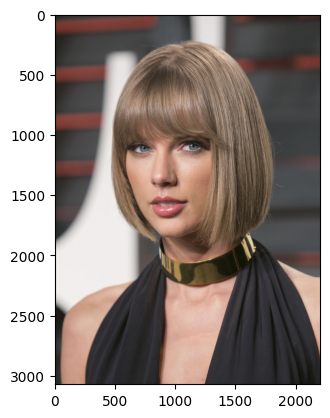

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
result = detector.detect_faces(img)

In [ ]:
result

[{'box': [564, 707, 839, 1115],
  'confidence': np.float64(0.9860840439796448),
  'keypoints': {'nose': [np.int64(854), np.int64(1377)],
   'mouth_right': [np.int64(1098), np.int64(1550)],
   'right_eye': [np.int64(1119), np.int64(1101)],
   'left_eye': [np.int64(730), np.int64(1117)],
   'mouth_left': [np.int64(791), np.int64(1562)]}}]

In [ ]:
x, y, w, h = result[0]['box']

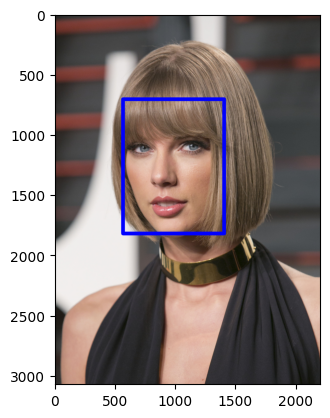

In [ ]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

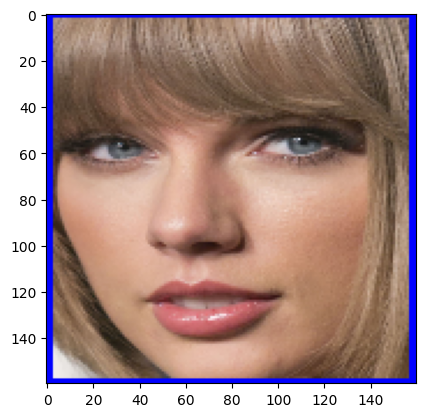

In [ ]:
my_face = img[y:y+h, x:x+w]
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], shape=(160, 160, 3), dtype=uint8)
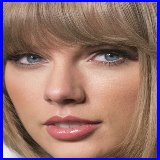

In [ ]:
my_face

In [ ]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []           #Used to store faces
        self.Y = []           #Used to store labels
        self.detector = MTCNN()


    def extract_face(self, filename, required_size=(160, 160)): # Changed to self and filename
        try:
            # image = Image.open(filename).convert('RGB')  # Remove this line as it's not needed
            image = Image.open(filename).convert('RGB') # Opening the file here
            pixels = np.asarray(image)
            results = self.detector.detect_faces(pixels) # Changed to self.detector
            if results:
                x1, y1, width, height = results[0]['box']
                x1, y1 = abs(x1), abs(y1)
                x2, y2 = x1 + width, y1 + height
                face = pixels[y1:y2, x1:x2]
                face_image = Image.fromarray(face)
                face_image = face_image.resize(required_size)
                return np.asarray(face_image)
        except Exception as e:
            print(f"Error processing {filename}: {e}")
        return None


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path) # Changed to self
                # Append only if a face was detected
                if single_face is not None:
                    FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

Load ArcFace Model

In [ ]:
app = FaceAnalysis(name="buffalo_l", providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 73806.39KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [ ]:
def get_arcface_embedding(img_path):
    try:
        img = cv.imread(img_path)
        # Check if image was loaded successfully
        if img is not None:
            faces = app.get(img)
            if faces:
                return faces[0].embedding  # 512D ArcFace embedding
        else:
            print(f"Warning: Could not read image at {img_path}. Skipping...")
        return None
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

In [ ]:
known_embeddings = {}
dataset_path = '/content/drive/MyDrive/dataset'

for person_folder in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person_folder)
    for filename in os.listdir(person_path):
        # Check if the file is an image file, you can add more image formats here
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.jfif')):
            full_path = os.path.join(person_path, filename)
            embedding = get_arcface_embedding(full_path)
            if embedding is not None:
                known_embeddings[full_path] = embedding

In [ ]:
threshold = 0.5  # Cosine similarity threshold
match_results = {}

file_paths = list(known_embeddings.keys())
embeddings = list(known_embeddings.values())

for i in range(len(file_paths)):
    face_i = embeddings[i]
    matches = []
    for j in range(len(file_paths)):
        if i == j:
            continue
        face_j = embeddings[j]
        sim = cosine_similarity([face_i], [face_j])[0][0]
        if sim > (1 - threshold):  # Higher cosine similarity = more alike
            matches.append(file_paths[j])
    match_results[file_paths[i]] = matches

In [ ]:
input_image_path = ('/content/drive/MyDrive/dataset/taylor_swift/5.jpg')

if input_image_path in match_results:
    matched_paths = match_results[input_image_path]
    print(f"\nFace from '{input_image_path}' is recognized in:")
    for match in matched_paths:
        print(f"  - {match}")
else:
    print(f"\nNo matches found for face from '{input_image_path}'")


Face from '/content/drive/MyDrive/dataset/taylor_swift/5.jpg' is recognized in:
  - /content/drive/MyDrive/dataset/taylor_swift/9.png
  - /content/drive/MyDrive/dataset/taylor_swift/2.jpg
  - /content/drive/MyDrive/dataset/taylor_swift/8.jpg
  - /content/drive/MyDrive/dataset/taylor_swift/10.jpg
  - /content/drive/MyDrive/dataset/taylor_swift/3.jfif
  - /content/drive/MyDrive/dataset/taylor_swift/6.jpg
  - /content/drive/MyDrive/dataset/taylor_swift/4.jpg
